<a href="https://colab.research.google.com/github/ako-precious/Ako.Precious.BDAT1004P2/blob/main/24F_Neural_Networks_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24F Neural Networks - 02

# Ako Precious Emmanuel (200545932)

# Assignment 1 (Dataset manipulation)



## Problem Statement


### Briefly Describe the Problem:
The main objective of this assignment is to predict the annual salary (in INR) offered to engineering graduates based on a wide range of features, including demographic details, academic performance, and test scores. The dataset, Engineering Graduate Salary, contains 33 independent variables (features) like high school marks, college GPA, test scores in various skill categories, and personality traits. The target variable, Salary, is a continuous numerical value representing the candidate’s salary.

Using this dataset, we aim to build a regression model that can accurately predict the salary of engineering graduates. This involves:

#### Data exploration and preprocessing:
Cleaning and preparing the data for modeling by handling missing values, encoding categorical variables, and scaling numerical features.
#### Feature selection:
Identifying the most relevant features that contribute to salary prediction.


#### Model building and evaluation:
 Training and validating regression models to predict salaries and evaluating them based on performance metrics like Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).
#### Hyper-parameter tuning:
 Optimizing the model parameters to improve performance.
The overall goal is to understand how different features affect salary predictions and to develop a robust model for this purpose.

### Assumptions and Constraints:
#### Assumptions:

The dataset is representative of the engineering graduate population and the salary distribution is consistent.
There is a linear or semi-linear relationship between the features and the target variable (salary).
The dataset is clean enough to extract meaningful insights and contains no significant outliers.
Some features (like exam scores or college tier) directly affect salary, while others (like personality traits) might have weaker correlations.
Constraints:

#### Dataset:
The dataset has missing values and redundant columns that need to be handled during preprocessing.
#### Libraries:
The assignment specifies using Scikit-learn for building machine learning models, meaning models and tools available in this library are preferred.
#### Programming Language:
 The problem is to be solved using Python.
#### Model Choice:
 We initially use Simple Linear Regression as required, but later explore additional models (e.g., Ridge, Lasso) for comparison.
####Evaluation Metrics:
 The model performance is measured using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).
####Hardware:
 The computations, especially hyper-parameter tuning, need to run efficiently, as heavy computations might be restricted based on available resources (e.g., local machines or limited cloud resources).


These constraints guide the methodology and tools used in solving the problem and ensure that the model aligns with the objectives of the assignment.

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/Engineering_graduate_salary.csv'
data = pd.read_csv(file_path)

# Display the first few records
first_records = data.head()


first_records


,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [2]:
# Display the number of rows and columns
shape = data.shape


shape

(2998, 34)

In [3]:

# Display dataset statistics
statistics = data.describe()
statistics

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [4]:

# Display Null values of each feature
null_values = data.isnull().sum()
null_values

,0
ID,0
Gender,0
DOB,0
10percentage,0
10board,0
12graduation,0
12percentage,0
12board,0
CollegeID,0
CollegeTier,0


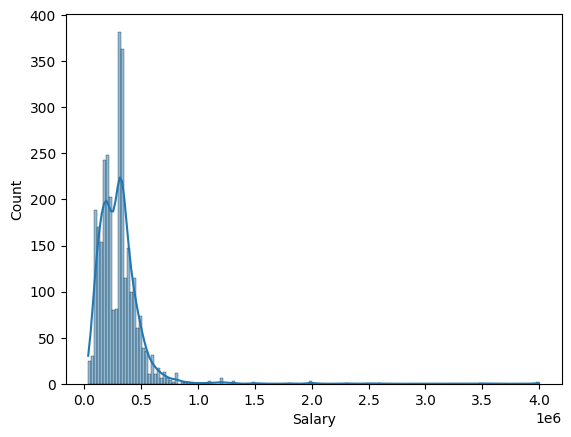

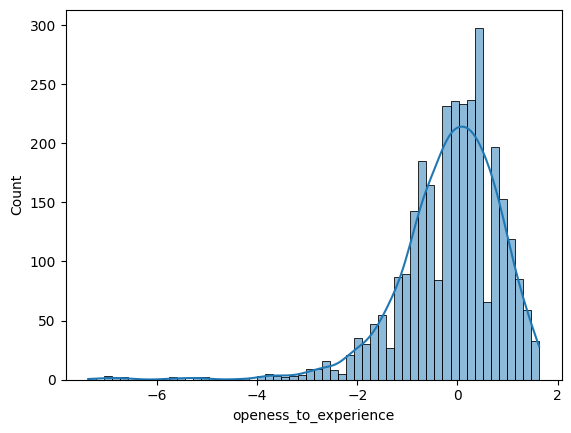

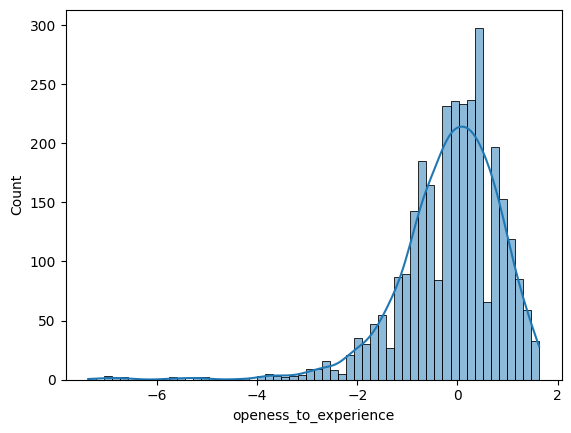

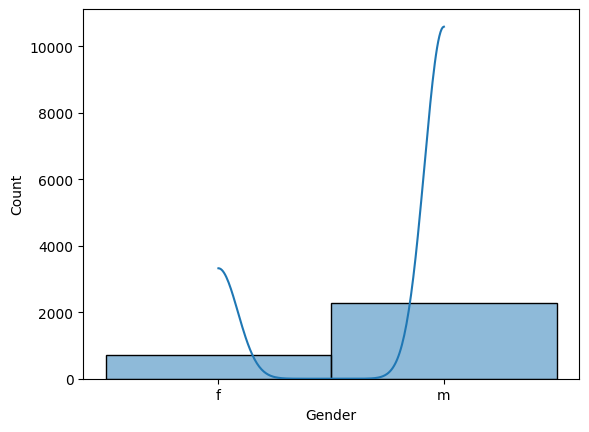

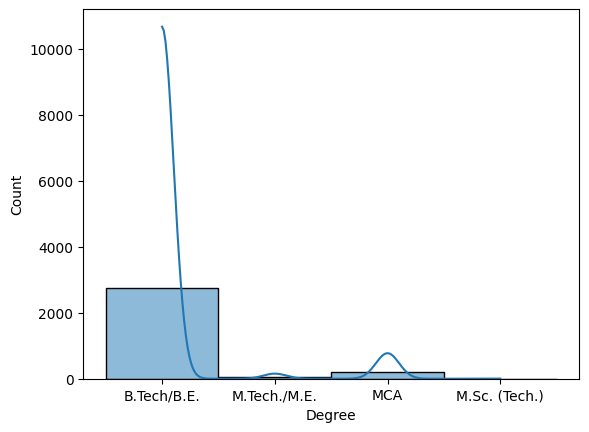

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the 'Salary' feature
sns.histplot(data['Salary'], kde=True)
plt.show()
# Plotting the distribution of the 'openess_to_experience' feature
sns.histplot(data['openess_to_experience'], kde=True)
plt.show()
# Plotting the distribution of the 'openess_to_experience' feature
sns.histplot(data['openess_to_experience'], kde=True)
plt.show()
# Plotting the distribution of the 'Gender' feature
sns.histplot(data['Gender'], kde=True)
plt.show()
# Plotting the distribution of the 'Degree' feature
sns.histplot(data['Degree'], kde=True)
plt.show()


In [6]:
# Clean dataset: remove obvious redundant information
# Checking for columns with -1 values, as these likely indicate missing data

# Removing columns with all or mostly -1 values
columns_with_neg_1 = (data == -1).sum() / len(data) > 0.9
data_cleaned = data.loc[:, ~columns_with_neg_1]

# After cleaning, display the number of rows and columns
cleaned_shape = data_cleaned.shape

# Display features left after cleaning
cleaned_columns = data_cleaned.columns

cleaned_shape, cleaned_columns


((2998, 30),
 Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
        '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
        'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
        'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
        'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
        'ComputerScience', 'conscientiousness', 'agreeableness', 'extraversion',
        'nueroticism', 'openess_to_experience', 'Salary'],
       dtype='object'))

<ipython-input-7-9213398d43e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['DOB'] = pd.to_datetime(data_cleaned['DOB'])


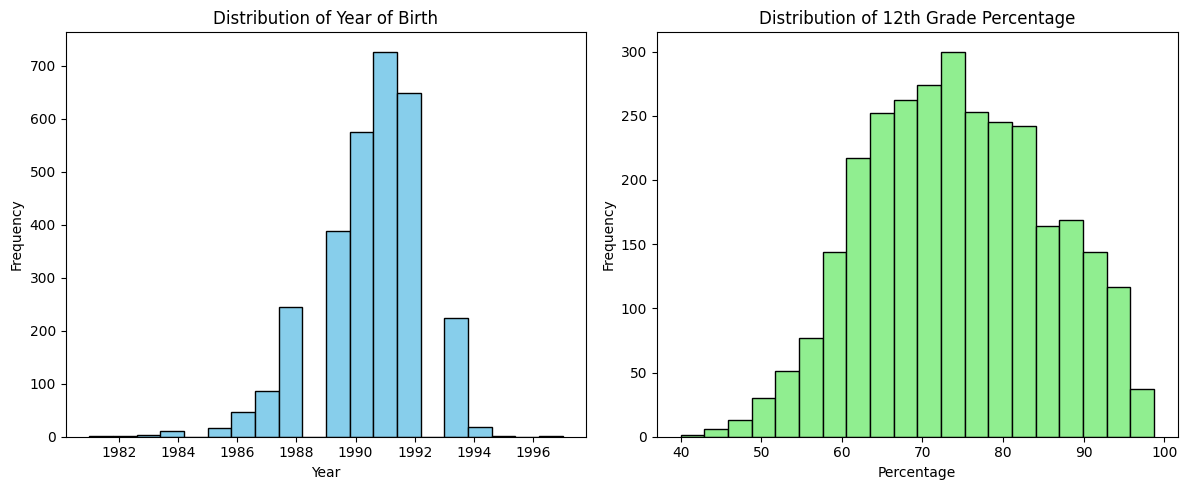

In [7]:
import matplotlib.pyplot as plt

# Convert DOB to a datetime type to extract the year
data_cleaned['DOB'] = pd.to_datetime(data_cleaned['DOB'])

# Plot histograms of DOB (year) and 12percentage
plt.figure(figsize=(12, 5))

# Distribution of Year of Birth
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['DOB'].dt.year, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Year of Birth')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Distribution of 12percentage
plt.subplot(1, 2, 2)
plt.hist(data_cleaned['12percentage'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of 12th Grade Percentage')
plt.xlabel('Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


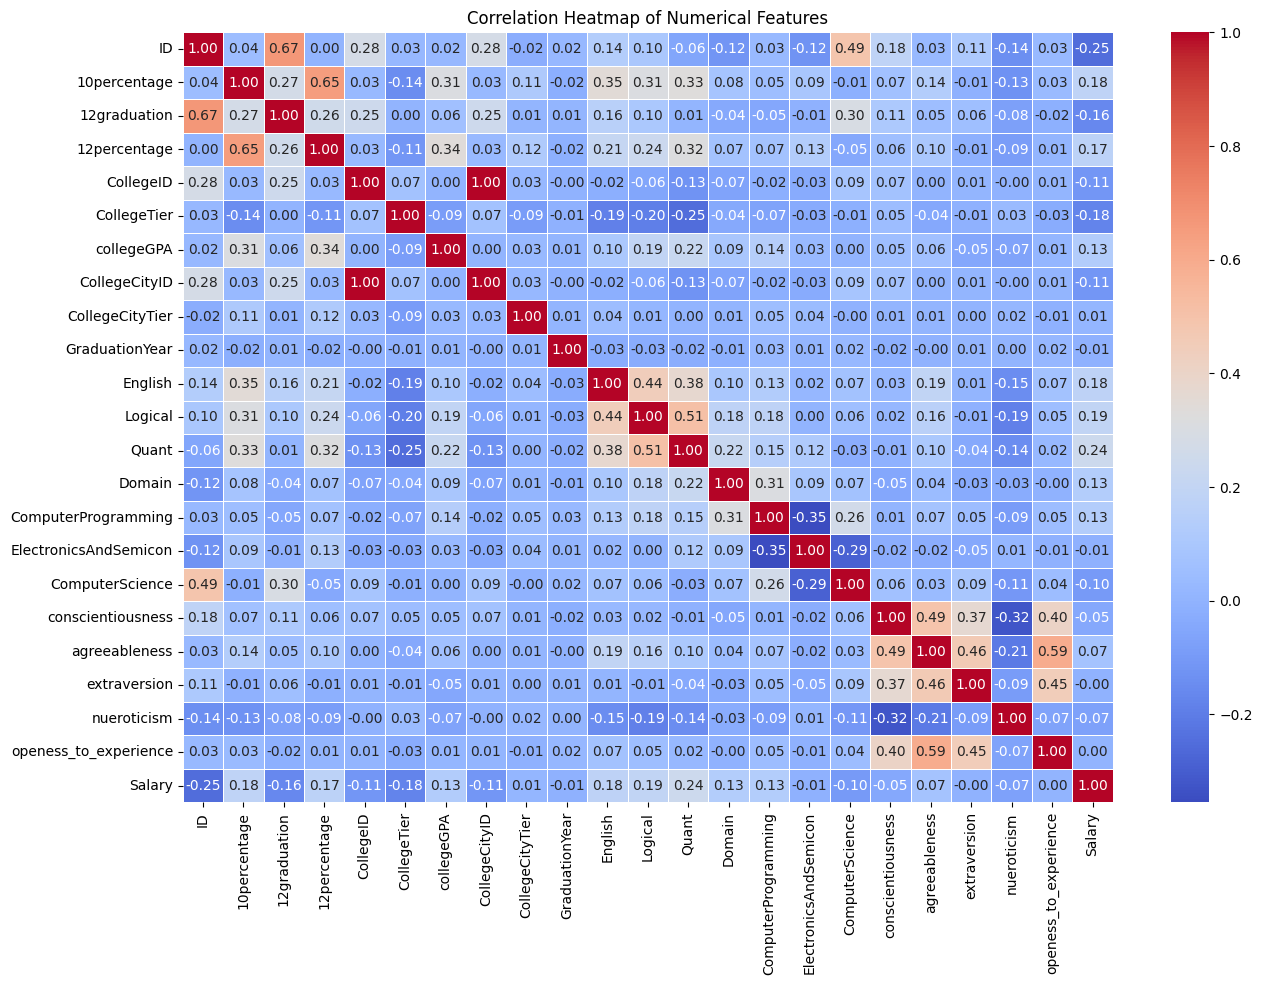

In [8]:
# Compute the correlation matrix for numerical columns
correlation_matrix = data_cleaned.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to scale (excluding the target column 'Salary')
# Removed 'CollegeGPA' as it is no longer present in the DataFrame
numeric_columns = ['10percentage', '12percentage', 'English', 'Logical', 'Quant', 'Domain',
                   'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
                   'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical features to the range (0,1)
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

<ipython-input-9-2e400c686561>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])


In [10]:
# Use one-hot encoding for categorical columns
categorical_columns = ['Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']

# Apply one-hot encoding using pandas get_dummies()
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)


In [11]:
from sklearn.model_selection import train_test_split

# Convert 'DOB' to age
current_year = pd.to_datetime('today').year
data_encoded['Age'] = current_year - pd.to_datetime(data_encoded['DOB']).dt.year
data_encoded = data_encoded.drop('DOB', axis=1)  # Remove the original 'DOB' column

# Define the target variable (Salary) and the features (everything else)
X = data_encoded.drop('Salary', axis=1)
y = data_encoded['Salary']

# Split the dataset into training, validation, and testing sets
# First, split into 80% train+validation and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the train+validation into 75% train and 25% validation (which is 60% of the whole dataset for training)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Print the shapes of the resulting sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (1798, 589), (1798,)
Validation set shape: (600, 589), (600,)
Test set shape: (600, 589), (600,)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) on validation set
mse_val = mean_squared_error(y_val, y_val_pred)

# Calculate Root Mean Squared Error (RMSE) on validation set
rmse_val = np.sqrt(mse_val)

# Calculate MSE and RMSE on test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Print the results
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")


Validation MSE: 14920038431019.494
Validation RMSE: 3862646.557869293
Test MSE: 5252953082016.963
Test RMSE: 2291932.1722112466


In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Perform Recursive Feature Elimination (RFE) to select top features
# Selecting 10 best features as an example
selector = RFE(model, n_features_to_select=10)
selector = selector.fit(X_train, y_train)

# Get the mask of selected features
selected_features = selector.support_

# Transform the dataset to only keep selected features
X_train_selected = X_train.loc[:, selected_features]
X_val_selected = X_val.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]

# Fit the model on the selected features
model.fit(X_train_selected, y_train)

# Predict on the validation and test sets
y_val_pred = model.predict(X_val_selected)
y_test_pred = model.predict(X_test_selected)

# Calculate MSE and RMSE for the selected features
mse_val_selected = mean_squared_error(y_val, y_val_pred)
rmse_val_selected = np.sqrt(mse_val_selected)

mse_test_selected = mean_squared_error(y_test, y_test_pred)
rmse_test_selected = np.sqrt(mse_test_selected)

print(f"Validation MSE (selected features): {mse_val_selected}")
print(f"Validation RMSE (selected features): {rmse_val_selected}")
print(f"Test MSE (selected features): {mse_test_selected}")
print(f"Test RMSE (selected features): {rmse_test_selected}")


Validation MSE (selected features): 6.3365085592421604e+35
Validation RMSE (selected features): 7.960218941236579e+17
Test MSE (selected features): 29575350477.81657
Test RMSE (selected features): 171974.85420205063


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Initialize Ridge regression model
ridge = Ridge()

# Define the parameter grid for alpha (regularization strength)
param_grid = {'alpha': [0.01, 0.1, 1.0, 10, 100]}

# Use Grid Search to find the best hyperparameter
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_selected, y_train)

# Best parameters
best_params = grid_search.best_params_

# Train Ridge model with best parameters on training data
best_ridge = grid_search.best_estimator_
best_ridge.fit(X_train_selected, y_train)

# Predict on validation and test sets
y_val_pred_ridge = best_ridge.predict(X_val_selected)
y_test_pred_ridge = best_ridge.predict(X_test_selected)

# Calculate MSE and RMSE for Ridge regression
mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
rmse_val_ridge = np.sqrt(mse_val_ridge)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

print(f"Best parameters: {best_params}")
print(f"Validation MSE (Ridge): {mse_val_ridge}")
print(f"Validation RMSE (Ridge): {rmse_val_ridge}")
print(f"Test MSE (Ridge): {mse_test_ridge}")
print(f"Test RMSE (Ridge): {rmse_test_ridge}")


Best parameters: {'alpha': 100}
Validation MSE (Ridge): 59607631207.79627
Validation RMSE (Ridge): 244146.74113695696
Test MSE (Ridge): 29572493068.764935
Test RMSE (Ridge): 171966.54636517225
